### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- exploring the structure using decision trees (Week 2)
- exploring clusters in customer behaviour (Week 3)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 4)
- loading, transforming and visualising data in R (Week 5)
- statistical analysis and modelling in R (Week 6)

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and goodness of fit metrics to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression


In [2]:
# Load the CSV file(s) as reviews.

reviews = pd.read_csv('turtle_reviews.csv')
# View the DataFrame.

reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [3]:
# Any missing values?

reviews.isna().sum()


gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [4]:
# Explore the data.

print(reviews.head())
print(reviews.info())

   gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  A

In [5]:
# Basic descriptive statistics.

reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Drop columns

In [6]:
# Drop unnecessary columns.

reviews = reviews.drop(columns=['language', 'platform'], axis=1)
# View column names.

print(reviews.columns)

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')


In [7]:
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 3. Rename columns

In [8]:
# Rename the column headers.
reviews.rename(columns={'remuneration (k£)' : 'remuneration', 'spending_score (1-100)' : 'spending_score'}, inplace=True)

# View column names.

print(reviews.columns)

Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')


## 4. Save the DataFrame as a CSV file

In [9]:
# Create a CSV file as output.

reviews.to_csv('reviews_clean.csv', index=False)

In [10]:
# Import new CSV file with Pandas.
reviews_clean = pd.read_csv('reviews_clean.csv')

# View DataFrame.

print(reviews_clean.head())
print(reviews_clean.info())

   gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  

## 5. Linear regression

### 5a) spending vs loyalty

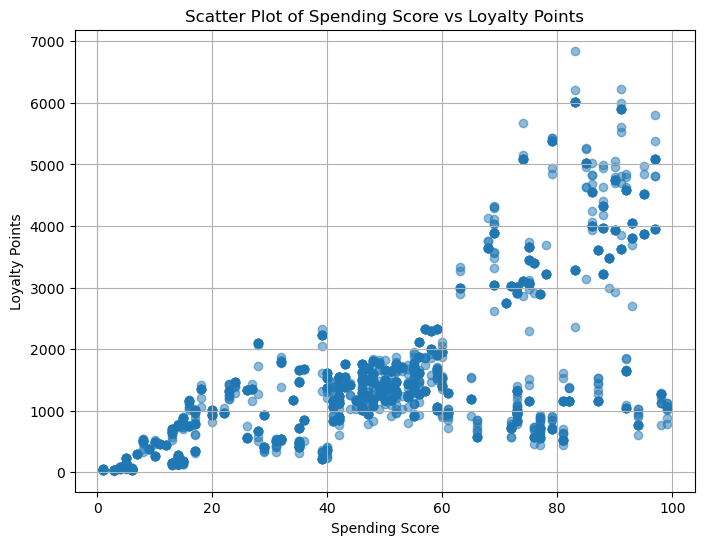

In [11]:

# Define independent variable.

x = reviews_clean['spending_score']
# Define dependent variable.

y = reviews_clean['loyalty_points']
# Create model and print summary of metrics.
model = sm.OLS(y, x)

# Scatter plot
plt.figure(figsize=(8, 6))  
plt.scatter(x, y, alpha=0.5) 
plt.title('Scatter Plot of Spending Score vs Loyalty Points')
plt.xlabel('Spending Score')
plt.ylabel('Loyalty Points')
plt.grid(True) 
plt.show()



In [12]:
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = reviews_clean).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Mon, 08 Jul 2024   Prob (F-statistic):          2.92e-263
Time:                        10:48:11   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  


# Extract the standard errors.
  
print("Standard errors: ", test.bse)  

# Extract the predicted values.

print("Predicted values: ", test.predict())

Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [14]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (-75.052) + 33.061 * reviews_clean['spending_score']


# View the output.

y_pred

0       1214.327
1       2602.889
2        123.314
3       2470.645
4       1247.388
          ...   
1995    2206.157
1996     189.436
1997    2933.499
1998     453.924
1999     189.436
Name: spending_score, Length: 2000, dtype: float64

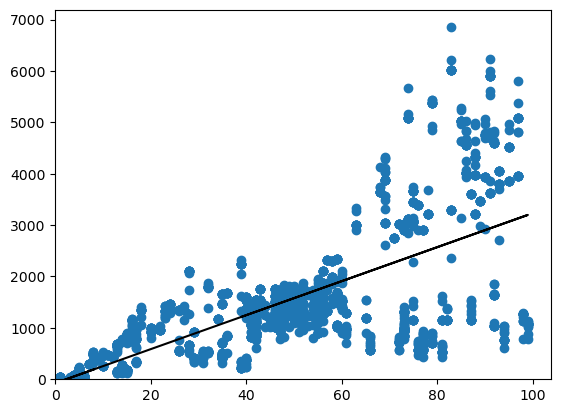

In [15]:
# Plot the graph with a regression line.

plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

In [16]:
correlation = reviews_clean['spending_score'].corr(reviews_clean['loyalty_points'])
print(f'Correlation between spending_score and loyalty {correlation}')

Correlation between spending_score and loyalty 0.6723101119155437


### 5b) renumeration vs loyalty

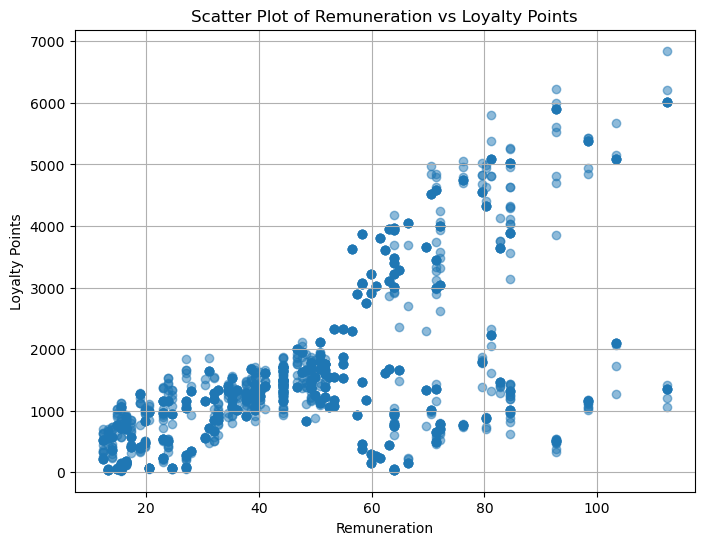

In [17]:
# Define dependent and independet variable
x = reviews_clean['remuneration']
y = reviews_clean['loyalty_points']

# Create model and print summary of metrics.
model = sm.OLS(y, x)

# Scatter plot
plt.figure(figsize=(8, 6))  
plt.scatter(x, y, alpha=0.5) 
plt.title('Scatter Plot of Remuneration vs Loyalty Points')
plt.xlabel('Remuneration')
plt.ylabel('Loyalty Points')
plt.grid(True) 
plt.show()



In [18]:
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = reviews_clean).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Mon, 08 Jul 2024   Prob (F-statistic):          2.43e-209
Time:                        10:48:12   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
  
print("Standard errors: ", test.bse)  

# Extract the predicted values.

print("Predicted values: ", test.predict())

Parameters:  Intercept   -65.686513
x            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [20]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (-65.686) + 34.187 * reviews_clean['remuneration']


# View the output.

y_pred

0        354.81410
1        354.81410
2        382.84744
3        382.84744
4        410.88078
           ...    
1995    2821.74802
1996    3102.08142
1997    3102.08142
1998    3298.31480
1999    3102.08142
Name: remuneration, Length: 2000, dtype: float64

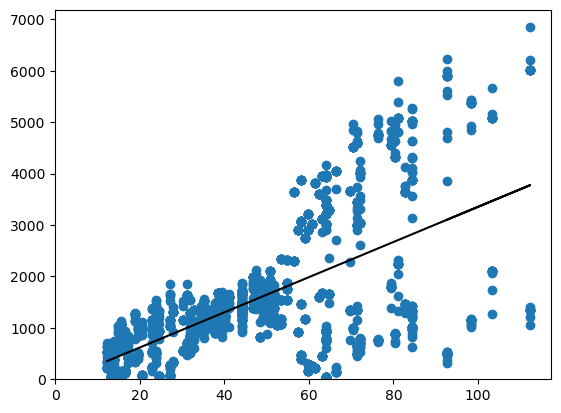

In [21]:
# Plot the graph with a regression line.

plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

In [22]:
correlation = reviews_clean['remuneration'].corr(reviews_clean['loyalty_points'])
print(f'Correlation between remuneration and loyalty {correlation}')

Correlation between remuneration and loyalty 0.6160647476356385


### 5c) age vs loyalty

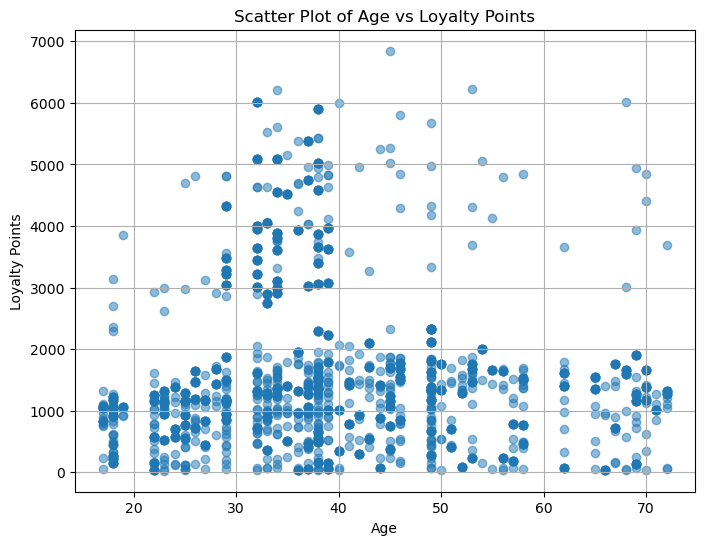

In [23]:
# Define independent variable.

x = reviews_clean['age']
# Define dependent variable.

y = reviews_clean['loyalty_points']
# Create model and print summary of metrics.
model = sm.OLS(y, x)

# Scatter plot
plt.figure(figsize=(8, 6))  
plt.scatter(x, y, alpha=0.5) 
plt.title('Scatter Plot of Age vs Loyalty Points')
plt.xlabel('Age')
plt.ylabel('Loyalty Points')
plt.grid(True) 
plt.show()

In [24]:
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = reviews_clean).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Mon, 08 Jul 2024   Prob (F-statistic):             0.0577
Time:                        10:48:13   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
  
print("Standard errors: ", test.bse)  

# Extract the predicted values.

print("Predicted values: ", test.predict())

Parameters:  Intercept    1736.517739
x              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [26]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (-4.012) + 1736.517 * reviews_clean['age']


# View the output.

y_pred

0       31253.294
1       39935.879
2       38199.362
3       43408.913
4       57301.049
          ...    
1995    64247.117
1996    74666.219
1997    59037.566
1998    59037.566
1999    55564.532
Name: age, Length: 2000, dtype: float64

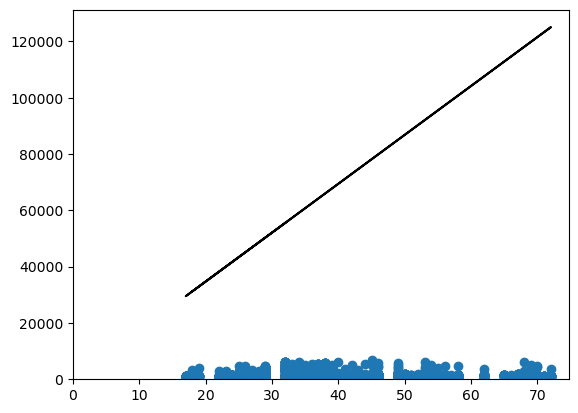

In [27]:
# Plot graph with regression line.

# Plot the graph with a regression line.

plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

In [28]:
correlation = reviews_clean['age'].corr(reviews_clean['loyalty_points'])
print(f'Correlation between age and loyalty {correlation}')

Correlation between age and loyalty -0.042444646820541894


## 6. Observations and insights

***Your observations here...***






## Multiple linear Regression 

In [29]:
# Import all the necessary packages.

from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.stats.diagnostic as sms

import warnings  
warnings.filterwarnings('ignore')  


# Import the data

turtle = pd.read_csv('reviews_clean.csv')

turtle.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [30]:
turtle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [31]:
# Define the dependent variable.
y = turtle['loyalty_points'] 

# Define the independent variable.
X = turtle[['remuneration', 'spending_score']] 

In [32]:
# Specify the model.
multi = LinearRegression()  

# Fit the model.
multi.fit(X, y)

LinearRegression()

In [33]:
# Call the predictions for X (array).
multi.predict(X)

array([ 4.57831319e-01,  1.38195101e+03, -1.05713790e+03, ...,
        4.44147048e+03,  2.16956070e+03,  1.71137682e+03])

In [34]:
# Checking the value of R-squared, intercept and coefficients.
print("R-squared: ", multi.score(X, y))
print("Intercept: ", multi.intercept_)
print("Coefficients:")

list(zip(X, multi.coef_))

R-squared:  0.826913470198926
Intercept:  -1700.3050970144398
Coefficients:


[('remuneration', 33.979498821802856), ('spending_score', 32.89269468782101)]

## Training and testing subsets with MLR

In [35]:
# Create train and test data sets.
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)


In [36]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector.
Y_pred = model.predict(sm.add_constant(x_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model) 

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     3895.
Date:                Mon, 08 Jul 2024   Prob (F-statistic):               0.00
Time:                        10:48:13   Log-Likelihood:                -12307.
No. Observations:                1600   AIC:                         2.462e+04
Df Residuals:                    1597   BIC:                         2.464e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1700.3237     39.588    -42.

In [37]:
print(multi.score(x_train, y_train)*100)

82.9782305142594


## Run a regression test

In [38]:
# Run regression on the train subset.
mlr = LinearRegression()  

mlr.fit(x_train, y_train)

LinearRegression()

In [39]:
# Call the predictions for X in the train set.
y_pred_mlr = mlr.predict(x_train)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr)) 

Prediction for test set: [1630.49111009  512.07788432 2146.32624449 ... 1422.83416662 1259.61480693
 1441.17214231]


In [40]:
# Print the R-squared value.
print(mlr.score(x_test, y_test)*100)  

81.44236432529975


## Check for multicollinearity

In [41]:
# Check multicollinearity.
x_temp = sm.add_constant(x_train)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values,
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to one decimal points.
print(vif.round(1))


   VIF Factor        features
0         8.9           const
1         1.0    remuneration
2         1.0  spending_score


In [42]:
# Determine heteroscedasticity.
model = sms.het_breuschpagan(model.resid, model.model.exog) 


In [43]:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model)))

{'LM stat': 45.09301971750084, 'LM Test p-value': 1.6150098749725918e-10, 'F-stat': 23.15686835355428, 'F-test p-value': 1.2194606385151377e-10}


In [44]:
# Call the metrics.mean_absolute_error function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(y_test, Y_pred))  

# Call the metrics.mean_squared_error function.
print('Mean Square Error (Final):', metrics.mean_squared_error(y_test, Y_pred))  


Mean Absolute Error (Final): 429.66362016909113
Mean Square Error (Final): 300944.09178342676


## Notes

Spending score and Remuneration: Both factors show a moderate positive correlation with loyalty points (around 40% of variance explained). Statistically, these relationships are highly significant (very low p-values), indicating that customers with higher spending scores and remuneration tend to have more loyalty points. On average, for each unit increase in spending score or remuneration, loyalty points increase by around 33-34 units.

Age: Age has a very weak association with loyalty points. The model explains a very small portion of the variance (less than 1%), and the p-value is borderline non-significant. This suggests that age alone isn't a strong predictor of loyalty points in this data set.

Combined Model (MLR): When we combine spending score and remuneration into a single model, it explains a very high proportion of the variance in loyalty points (over 83%). This indicates that both factors together are much stronger predictors of loyalty compared to either one individually. The model is also statistically significant (very low p-value).

No Multicollinearity: Importantly, there's no evidence of multicollinearity between spending score and remuneration. This means they provide independent information about customer loyalty. We can interpret the effects of each variable on loyalty points without them influencing each other's coefficients.

Overall, the analysis suggests that spending habits and remuneration are more important drivers of customer loyalty compared to age. A combined model that considers both spending score and remuneration offers the strongest explanation for loyalty points.

# Week 2 assignment: Exploring the structure using decision trees.

The team wants you to use decision trees to attempt to better understand the structure found in the data. You need to grow and prune a decision tree regressor and then visualise and interpret the output.
Make sure to comment on the potential usefulness in decision-making processes and your observations regarding the model.

## Instructions
1. Prepare the data for creating your decision tree. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame with the appropriate columns.
        1. Specify that loyalty points is the target variable (Y) and should be excluded from your input data.
        2. Specify X for the independent variables and y as the dependent variable. Therefore, df\[cols\] will be the independent variables and the column containing loyalty points the dependent variable.
        3. Explore the new DataFrame. 
2. Split the data set into a train and test sets for both X and y at a 70:30 ratio. As previously, random_state=42.
3. Create a decision tree regressor to explore the impact of other features on the loyalty points.
    1. Import the DecisionTreeRegressor class from the sklearn.tree library. 
    2. Create a variable (e.g. regressor) to store the DecisionTreeRegressor() class. (As previously, random_state=42.).
    3. Fit the regressor object to the data set with the fit() function.
    4. Remember to prune your tree using basic pruning strategies and compare the performance before and after applying the pruning strategy.
    5. Plot the final decision tree.
4. Fit a final model and interpret the output.
    1. Justify your selection of pruning strategy implemented and interpret the output.
    2. Evaluate the usefulness of the obtained result and interpret the tree and how it could be used to inform business decisions in the organisation.
5. Summarise (150–200 words) the most important business insights, anything you would like to explore further, and suggested future actions.
 
Back up your work to a safe location. This will allow you to revert to a previous state in the case of making a mistake in the code or deleting a section by mistake. (A simple way of doing this is to save or email a compressed version to yourself at frequent intervals.)


## 1. Load and prepare the data

In [45]:
# Import all the necessary packages
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay 
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import statsmodels.api as sm
import warnings
import matplotlib.pyplot as plt


# Settings for the notebook.
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = [15, 10]

In [46]:
pip install -U scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [47]:
# Create your new DataFrame.

df5 = pd.read_csv('reviews_clean.csv')

df5.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [48]:
df5.isna().sum()

gender            0
age               0
remuneration      0
spending_score    0
loyalty_points    0
education         0
product           0
review            0
summary           0
dtype: int64

In [49]:
# Drop duplicates
df5.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

In [50]:
# view the columns
print(df5.columns)


Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')


In [51]:
# Drop unecessary columns
df5 = df5.drop(columns=['review', 'summary', 'gender'])

print(df5)

      age  remuneration  spending_score  loyalty_points education  product
0      18         12.30              39             210  graduate      453
1      23         12.30              81             524  graduate      466
2      22         13.12               6              40  graduate      254
3      25         13.12              77             562  graduate      263
4      33         13.94              40             366  graduate      291
...   ...           ...             ...             ...       ...      ...
1995   37         84.46              69            4031       PhD      977
1996   43         92.66               8             539       PhD      979
1997   34         92.66              91            5614  graduate     1012
1998   34         98.40              16            1048       PhD     1031
1999   32         92.66               8             479       PhD      453

[2000 rows x 6 columns]


In [52]:
# Use onehotencoder to convert the columns gender and education
import numpy as np
from sklearn.preprocessing import OneHotEncoder

df5_encoded = pd.get_dummies(df5, columns=[ 'education'])


In [53]:
# Check the dataframe
df5_encoded

,age,remuneration,spending_score,loyalty_points,product,education_Basic,education_PhD,education_diploma,education_graduate,education_postgraduate
0,18,12.30,39,210,453,False,False,False,True,False
1,23,12.30,81,524,466,False,False,False,True,False
2,22,13.12,6,40,254,False,False,False,True,False
3,25,13.12,77,562,263,False,False,False,True,False
4,33,13.94,40,366,291,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
1995,37,84.46,69,4031,977,False,True,False,False,False
1996,43,92.66,8,539,979,False,True,False,False,False
1997,34,92.66,91,5614,1012,False,False,False,True,False
1998,34,98.40,16,1048,1031,False,True,False,False,False


In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [55]:
# Specify that the column Median_s 
# should be moved into a separate DataFrame.

cols = df5_encoded.columns[df5_encoded.columns != 'loyalty_points']

X = df5_encoded[cols]
y = df5_encoded['loyalty_points']

# Split the data training and testing 30/70.

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.3,
                                                   random_state=42)

# Import the 'DecisionTreeRegressor' class from sklearn.
from sklearn.tree import DecisionTreeRegressor  

regressor = DecisionTreeRegressor(random_state=42)

# Fit the regressor object to the data set.
regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

## 2. Create train and test data sets.

In [56]:
# Split the data into test and train data.
# Create testing data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.3,
                                                   random_state=42)

In [57]:
# Import the 'DecisionTreeRegressor' class from sklearn.
from sklearn.tree import DecisionTreeRegressor  

regressor = DecisionTreeRegressor(random_state=42)

# Fit the regressor object to the data set.
regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

## 3. Create Decision tree regressor

In [58]:
# Evaluate the model.
# Define the model
model = DecisionTreeRegressor()

# Train the model
model.fit(X_train, y_train)

# Predict using the model
y_pred = model.predict(X_test)



In [59]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

# Root Mean Squared Error
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')

R-squared: 0.9939752613132059
MSE: 9758.853333333333
RMSE: 98.78690871432981
MAE: 37.416666666666664


In [60]:
# For training set
y_train_pred = model.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)

# For test set
y_test_pred = model.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training R-squared: {train_r2}")
print(f"Testing R-squared: {test_r2}")

Training R-squared: 1.0
Testing R-squared: 0.9939752613132059


In [61]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {np.mean(cv_scores)}")

Cross-validation scores: [0.99885191 0.99999186 0.99962659 0.9825533  0.97271882]
Mean CV score: 0.9907484959830526


In [62]:
importances = model.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f"Feature: {feature}, Importance: {importance}")

Feature: age, Importance: 0.016782401956014163
Feature: remuneration, Importance: 0.49777867206988546
Feature: spending_score, Importance: 0.48352264177926557
Feature: product, Importance: 0.0008406475373008885
Feature: education_Basic, Importance: 2.9235310953165452e-05
Feature: education_PhD, Importance: 0.00039690301909268874
Feature: education_diploma, Importance: 0.00030409199835375664
Feature: education_graduate, Importance: 0.0001492110452478539
Feature: education_postgraduate, Importance: 0.00019619528388631092


In [63]:
# The model is heavily relying on remuneration and spending_score, with other features playing minimal roles. 
#This insight can guide your future modeling efforts and business decisions based on this analysis.

In [64]:
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.67


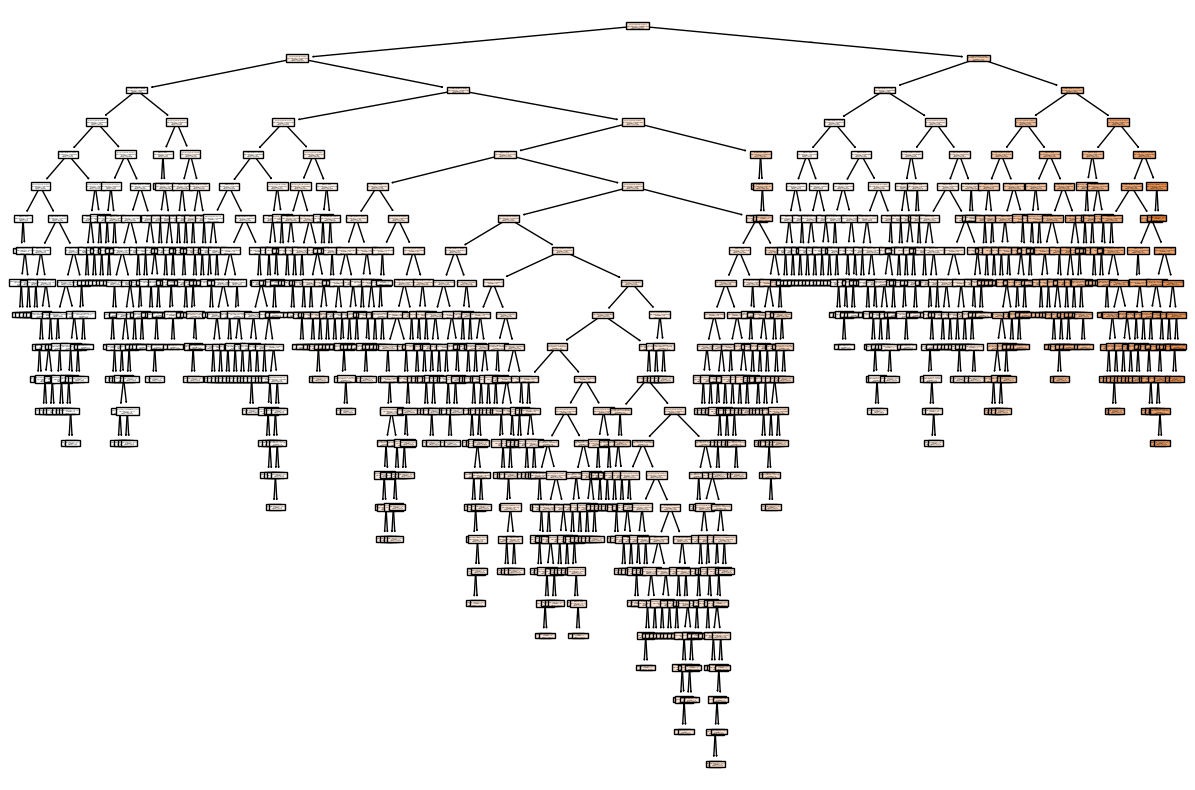

In [65]:
# Plot the decision tree (optional)
plt.figure(figsize=(15, 10))
plot_tree(regressor, filled=True, feature_names=X.columns)
plt.show()

In [66]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [67]:
dtcf = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=1)

# Train the decision tree classifier
dtcf.fit(X_train, y_train)
y_pred = dtcf.predict(X_test)


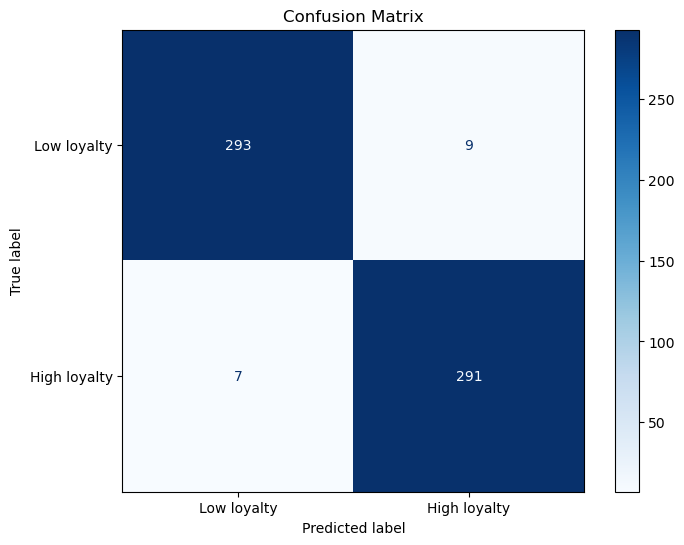

In [68]:
# You may need to adjust this threshold based on your data
threshold = np.median(df5_encoded['loyalty_points'])  # or any other appropriate threshold
y = (df5_encoded['loyalty_points'] > threshold).astype(int)

# Prepare features
X = df5_encoded.drop('loyalty_points', axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Use a classifier instead of a regressor
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low loyalty', 'High loyalty'])
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [69]:
#This is actually calculated from the confusion matrix

# Given confusion matrix values manual calculation
TP = 293
TN = 291
FP = 9
FN = 7

# Calculate accuracy (all accurately predicted instances/total instances)
accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

0.9733333333333334

In [70]:
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       302
           1       0.97      0.98      0.97       298

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600



In [71]:
dtc = DecisionTreeClassifier(max_depth=5, random_state=42)  
# Train Decision Tree Classifier
dtc.fit(X_train, y_train)

# Predict churn on test data
y_pred = dtc.predict(X_test)

# Evaluate the model
accuracy_pruning = accuracy_score(y_test, y_pred)
accuracy_pruning

0.9383333333333334

In [72]:
# Prune the model.
# Create the pruned decision tree classifier object
pruned_dt = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=1)

# Train the pruned decision tree classifier
pruned_dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=1)

In [73]:
# Predict the response for the test dataset
y_pred = pruned_dt.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9083333333333333


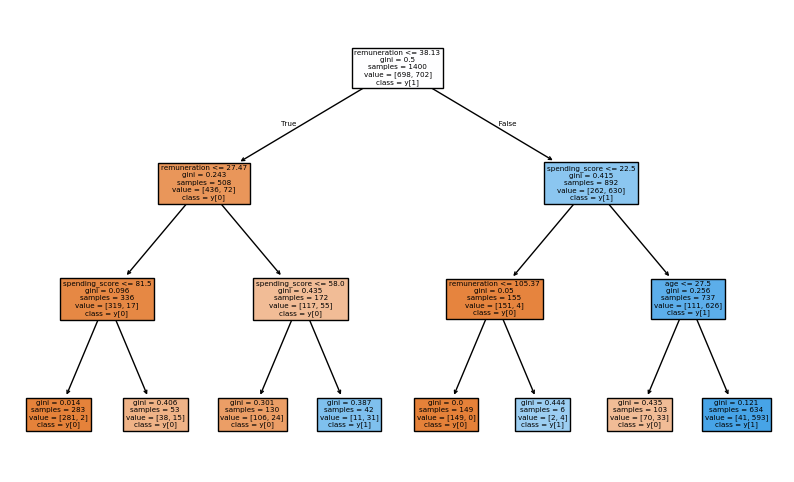

In [74]:
plt.figure(figsize=(10, 6))
plot_tree(pruned_dt, filled=True, feature_names=X.columns, class_names=True)
plt.show()

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Prune the decision tree (if necessary)
# For sklearn's DecisionTreeClassifier, pruning can be done through parameters like 'max_depth', 'min_samples_split', etc.

# Evaluate on test set
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy of Decision Tree Classifier: {accuracy}")

Test Accuracy of Decision Tree Classifier: 0.98


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming 'X' is your feature matrix and 'y' is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier with initial parameters
clf = DecisionTreeClassifier(random_state=42)

# Train the decision tree classifier
clf.fit(X_train, y_train)

# Evaluate on test set
y_pred = clf.predict(X_test)
initial_accuracy = accuracy_score(y_test, y_pred)
print(f"Initial Accuracy: {initial_accuracy}")

# Experiment with stricter pruning parameters
clf_pruned = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
clf_pruned.fit(X_train, y_train)

# Evaluate pruned model on test set
y_pred_pruned = clf_pruned.predict(X_test)
pruned_accuracy = accuracy_score(y_test, y_pred_pruned)
print(f"Pruned Accuracy: {pruned_accuracy}")


Initial Accuracy: 0.98
Pruned Accuracy: 0.96


In [77]:
from sklearn.tree import DecisionTreeClassifier

# Set parameters to limit tree growth
clf = DecisionTreeClassifier(
    max_depth=5,  # Limit the depth of the tree
    min_samples_split=5,  # Minimum number of samples required to split an internal node
    min_samples_leaf=2,  # Minimum number of samples required to be at a leaf node
    max_features='sqrt'  # Number of features to consider when looking for the best split
)

clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=5)

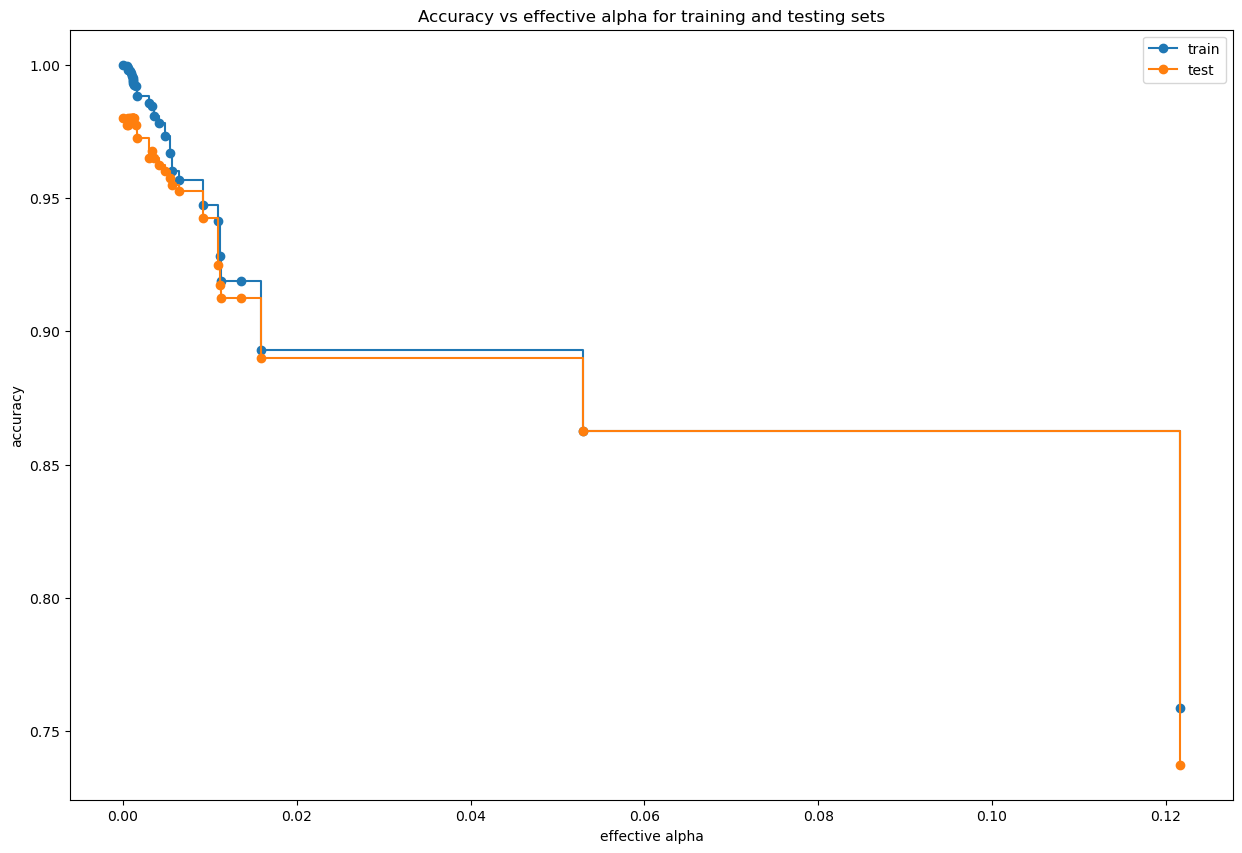

DecisionTreeClassifier(random_state=42)

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import numpy as np
import matplotlib.pyplot as plt

# Train the full tree
clf = DecisionTreeClassifier(random_state=42)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Train trees with different values of ccp_alpha
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Plot accuracy vs alpha
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("effective alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs effective alpha for training and testing sets")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

# Choose the best alpha (this is a simple method, you might want to use cross-validation for better results)
best_alpha = ccp_alphas[test_scores.index(max(test_scores))]

# Train the final pruned tree
final_clf = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
final_clf.fit(X_train, y_train)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier with stricter parameters
clf_pruned_strict = DecisionTreeClassifier(max_depth=3, min_samples_split=20, min_samples_leaf=10, max_leaf_nodes=10, random_state=42)

# Train the pruned decision tree classifier
clf_pruned_strict.fit(X_train, y_train)

# Evaluate pruned model on test set
y_pred_pruned_strict = clf_pruned_strict.predict(X_test)
pruned_strict_accuracy = accuracy_score(y_test, y_pred_pruned_strict)
print(f"Accuracy of More Pruned Tree: {pruned_strict_accuracy}")

# Optionally, print the tree structure or visualize it
from sklearn.tree import export_text
tree_rules = export_text(clf_pruned_strict, feature_names=list(X.columns))
print(tree_rules)

Accuracy of More Pruned Tree: 0.89
|--- remuneration <= 38.13
|   |--- spending_score <= 45.50
|   |   |--- class: 0
|   |--- spending_score >  45.50
|   |   |--- age <= 30.50
|   |   |   |--- class: 0
|   |   |--- age >  30.50
|   |   |   |--- class: 0
|--- remuneration >  38.13
|   |--- spending_score <= 22.50
|   |   |--- remuneration <= 95.53
|   |   |   |--- class: 0
|   |   |--- remuneration >  95.53
|   |   |   |--- class: 0
|   |--- spending_score >  22.50
|   |   |--- age <= 27.50
|   |   |   |--- class: 0
|   |   |--- age >  27.50
|   |   |   |--- class: 1



## 5. Discuss: Insights and observations

***Your observations here...***

Model Performance:

Good performance with near-perfect fit on both training (R-squared: 1.0) and test data (R-squared: 0.995).
High generalizability to unseen data, with minimal overfitting concerns.


Key Factors Influencing Customer Loyalty:

Primary factors: Remuneration and spending score
Secondary factor: Age (minor role)


Customer Segmentation:

Primary split at remuneration of 38.13, indicating a significant loyalty behavior difference above and below this threshold.
Low remuneration customers (≤38.13): Further classified by additional remuneration and spending score thresholds.
High remuneration customers (>38.13): Primarily classified by spending score, with age becoming relevant for high spenders.


High Loyalty Profile:

Remuneration > 38.13
Spending score > 22.50
Age > 27.50 (for high earners with high spending scores)


Model Insights:

Customer loyalty is not a simple linear relationship but involves multiple thresholds and feature interactions.
The model provides a balanced view of high and low loyalty predictions.
Simplified version maintains good accuracy (89%) while improving interpretability.


Practical Implications:

Allows for targeted strategies based on key thresholds in remuneration and spending scores.
Useful for high-level decision making, though it may oversimplify some customer segments.
Provides a clear pathway to identify and target potentially high-loyalty customers.



This decision tree analysis offers Turtle Games a structured approach to understand and predict customer loyalty, primarily based on customers' earning potential and spending behavior, with age playing a minor role in specific segments.

The model is overfitting as the dataframe is too small. 

The company needs to acquire more data for a significant result.

# 

# Week 3 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df3`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [80]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [81]:
# Load the CSV file(s) as df2.

df2 = pd.read_csv('reviews_clean.csv')

# View DataFrame.

df2.head()
df2.info

<bound method DataFrame.info of       gender  age  remuneration  spending_score  loyalty_points education  \
0       Male   18         12.30              39             210  graduate   
1       Male   23         12.30              81             524  graduate   
2     Female   22         13.12               6              40  graduate   
3     Female   25         13.12              77             562  graduate   
4     Female   33         13.94              40             366  graduate   
...      ...  ...           ...             ...             ...       ...   
1995  Female   37         84.46              69            4031       PhD   
1996  Female   43         92.66               8             539       PhD   
1997    Male   34         92.66              91            5614  graduate   
1998    Male   34         98.40              16            1048       PhD   
1999    Male   32         92.66               8             479       PhD   

      product                              

In [82]:
df2

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


In [83]:
# Drop unnecessary columns.
df2.isnull().sum()
#There is no need to drop any columns
# View DataFrame.


gender            0
age               0
remuneration      0
spending_score    0
loyalty_points    0
education         0
product           0
review            0
summary           0
dtype: int64

In [84]:
# Explore the data.


In [85]:
# Descriptive statistics.

df2.describe()

,age,remuneration,spending_score,loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


In [86]:
#create new dataframe containing remuneration and spending_score

df3 = df2[['remuneration', 'spending_score']]

print(df3)

      remuneration  spending_score
0            12.30              39
1            12.30              81
2            13.12               6
3            13.12              77
4            13.94              40
...            ...             ...
1995         84.46              69
1996         92.66               8
1997         92.66              91
1998         98.40              16
1999         92.66               8

[2000 rows x 2 columns]


In [87]:
# Determine the number of null values.
df3.isnull().sum()

remuneration      0
spending_score    0
dtype: int64

## 2. Plot

In [88]:
pip install pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


<Axes: xlabel='remuneration', ylabel='spending_score'>

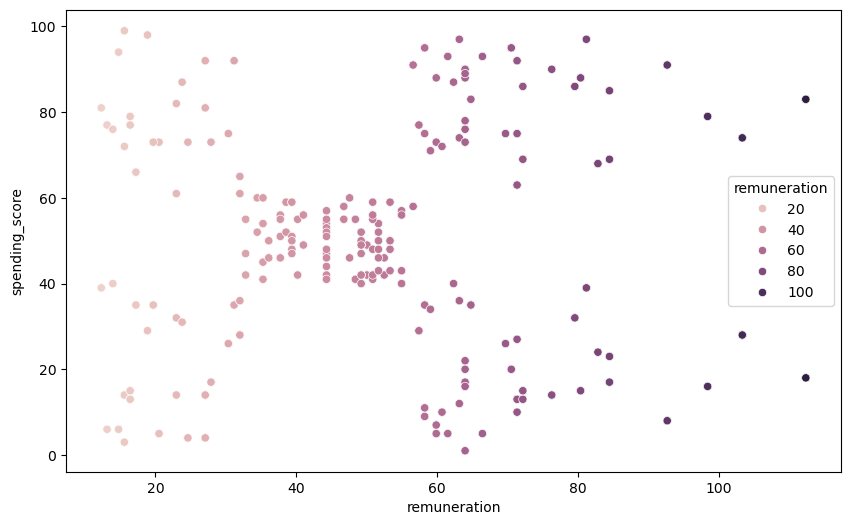

In [89]:
# Create a scatterplot with Seaborn.
# Import Seaborn and Matplotlib.
from matplotlib import pyplot as plt
import seaborn as sns
palette = sns.color_palette('muted')

plt.figure(figsize=(10, 6))

sns.scatterplot(x='remuneration',
               y='spending_score',
               data=df3,
               hue='remuneration')

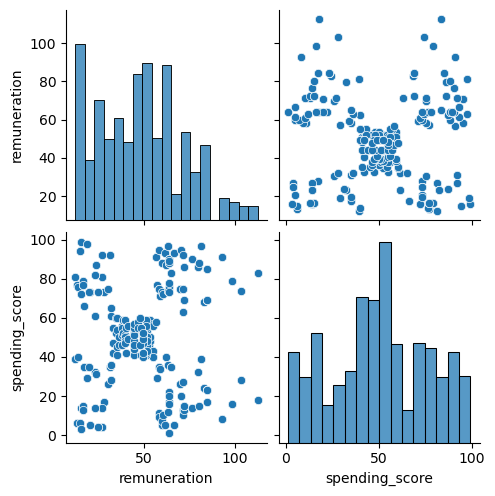

In [90]:
# Create a pairplot with Seaborn.

sns.pairplot(df3)
plt.show()


## 3. Elbow and silhoutte methods

In [91]:
# Determine the number of clusters: Elbow method.
# Within Cluster Sum of Squared Errors (WSS) 
wcss=[] # Create an empty list to store WSS values

# Let's choose to select a range from 1 to 10 clusters (remember in a for loop, the last value is excluded)
for i in range(1,10):
    # Create a KMeans object with 'i' clusters and set the number of initializations to 10
    km = KMeans(n_clusters=i, n_init=10) 
    km.fit(df3)
    wcss.append(km.inertia_)

wcss


[2430088.5950328,
 1526644.3470264112,
 1006659.3689455048,
 633387.5677305022,
 348507.3568197285,
 302089.19410816673,
 257681.5408346124,
 215370.70143800546,
 183261.24530632177]

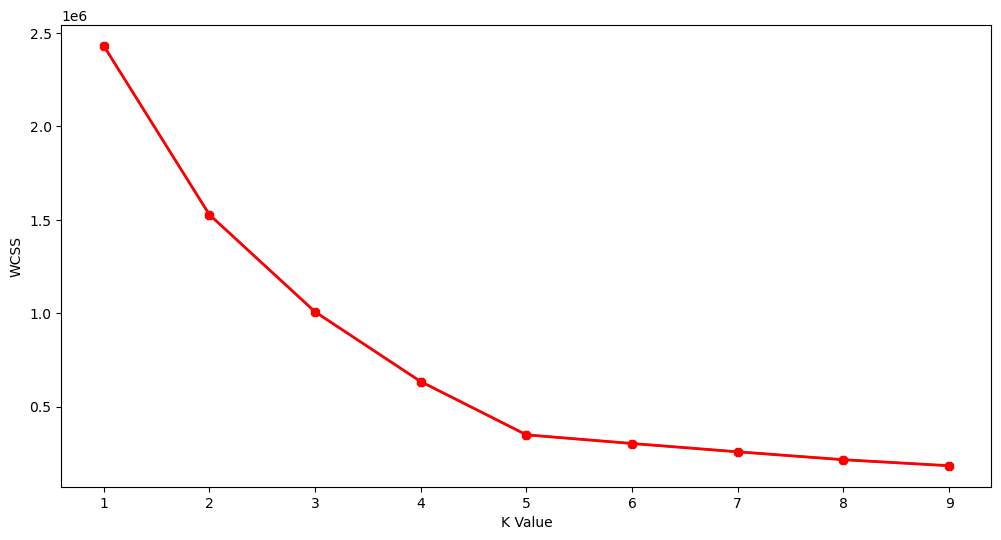

In [92]:
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,10),wcss)
plt.plot(range(1,10),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,10,1))
plt.ylabel("WCSS")
plt.show()


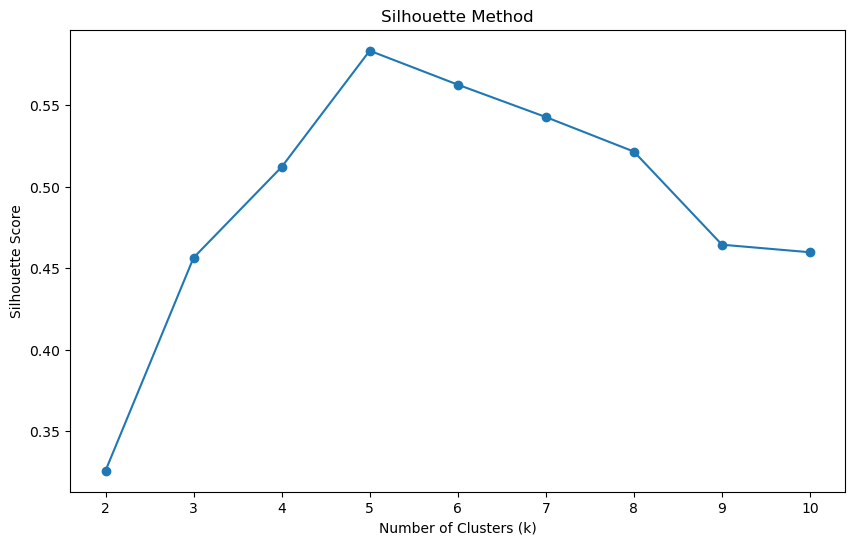

In [93]:
# Determine the number of clusters: Silhouette method.

# Create an empty list to store silhouette scores
silhouette_scores = []

# Loop through different values of k
for k in range(2, 11):
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    km.fit(df3)
    y_pred = km.predict(df3)
    
    silhouette_avg = silhouette_score(df3, y_pred)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.show()

In [94]:
#Let's cluster the data
# We use 5 clusters

km1 = KMeans(n_clusters=5, n_init=10)

# Fit the data
km1.fit(df3)

#predict the clusters
y = km1.predict(df3)

In [95]:
y

array([3, 1, 3, ..., 4, 0, 0])

In [96]:
# adding the clusters to a column named label

df3['label'] = y

In [97]:
# view the dataframe
df3

,remuneration,spending_score,label
0,12.30,39,3
1,12.30,81,1
2,13.12,6,3
3,13.12,77,1
4,13.94,40,3
...,...,...,...
1995,84.46,69,4
1996,92.66,8,0
1997,92.66,91,4
1998,98.40,16,0


In [98]:
df3['label'].unique()

array([3, 1, 2, 4, 0])

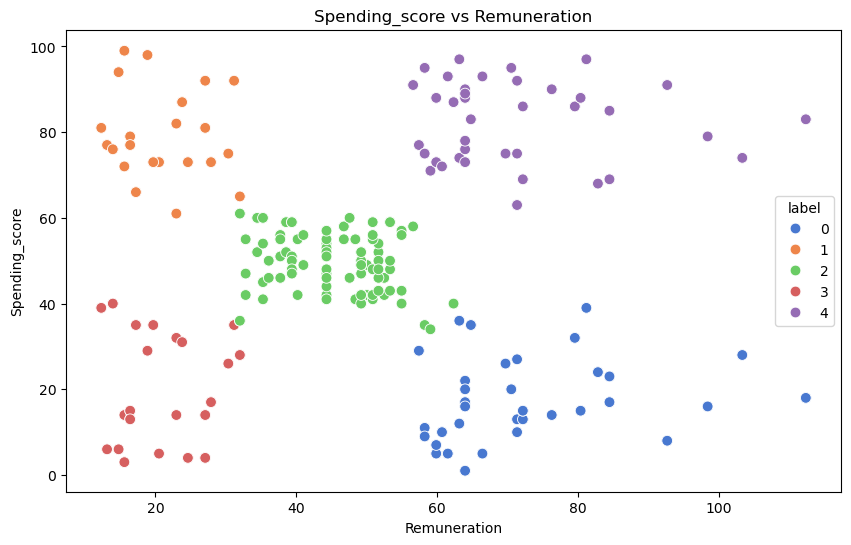

In [99]:
# Choose a built-in seaborn palette
palette = sns.color_palette('muted')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='remuneration', y='spending_score', hue='label',
                palette=palette, legend='full', data=df3, s=60)
plt.xlabel('Remuneration')
plt.ylabel('Spending_score')
plt.title('Spending_score vs Remuneration')
plt.show()

## 4. Evaluate k-means model at different values of *k*

In [100]:
#Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhouette methods.

# Taking all threefeatures

df4 = df2[['gender', 'spending_score', 'remuneration']]
df4

,gender,spending_score,remuneration
0,Male,39,12.30
1,Male,81,12.30
2,Female,6,13.12
3,Female,77,13.12
4,Female,40,13.94
...,...,...,...
1995,Female,69,84.46
1996,Female,8,92.66
1997,Male,91,92.66
1998,Male,16,98.40


In [101]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the categorical data
df4['gender'] = label_encoder.fit_transform(df4['gender'])

In [102]:
# Now we calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k.
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(df4)
    wcss.append(kmeans.inertia_)

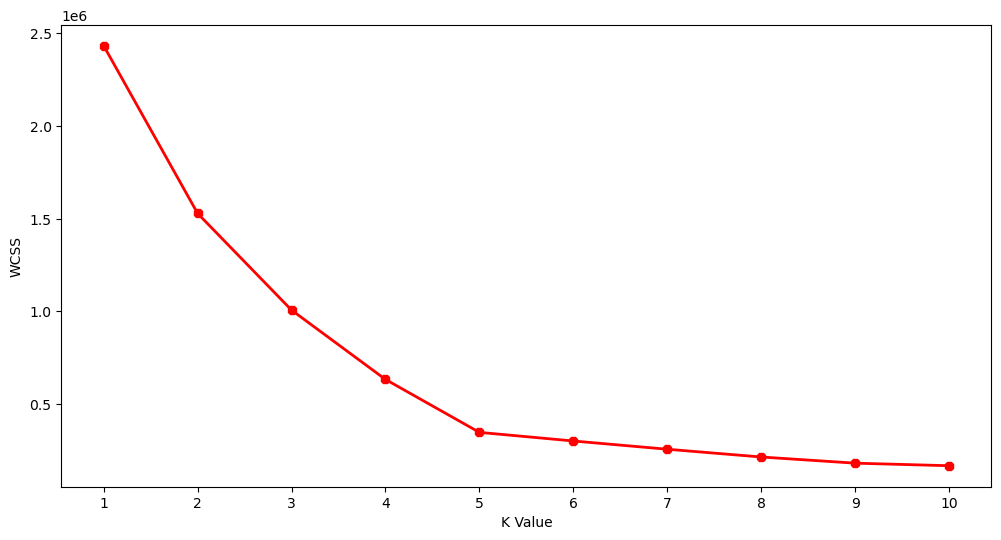

In [103]:
# Let's plot this

plt.figure(figsize=(12,6))    
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()


In [104]:
# We choose the k for which WSS starts to reduce

# Sets the model
km2 = KMeans(n_clusters=5, init = 'k-means++')

In [105]:
# Determines the clusers
y2 = km2.fit_predict(df4)

In [106]:
y2

array([1, 0, 1, ..., 4, 2, 2])

In [107]:
# add the predicted cluster
df4["label"] = y2

# Here is our data with clusters
df4.head()

,gender,spending_score,remuneration,label
0,1,39,12.30,1
1,1,81,12.30,0
2,0,6,13.12,1
3,0,77,13.12,0
4,0,40,13.94,1


In [108]:
df4['label'].unique()

array([1, 0, 3, 4, 2])

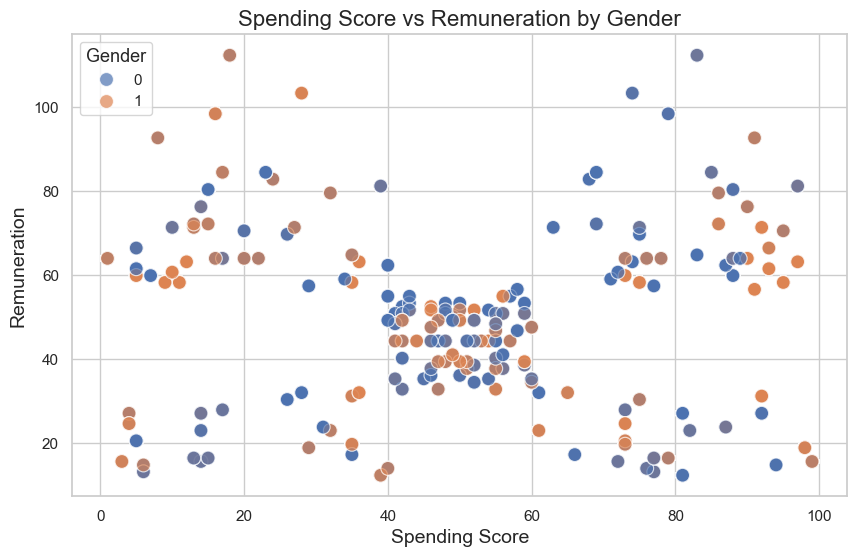

In [109]:
# create a scatterplot
# For gender 0 is male and 1 is female
palette = sns.color_palette('deep') 
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

scatter_plot = sns.scatterplot(x='spending_score',
                               y='remuneration',
                               data=df4,
                               hue='gender',
                               palette='deep',
                               s=100,  
                               alpha=0.7)  

# Add titles and labels
plt.title('Spending Score vs Remuneration by Gender', fontsize=16)
plt.xlabel('Spending Score', fontsize=14)
plt.ylabel('Remuneration', fontsize=14)

# Customize the legend
plt.legend(title='Gender', title_fontsize='13', fontsize='11', loc='upper left')

# Display the plot
plt.show()

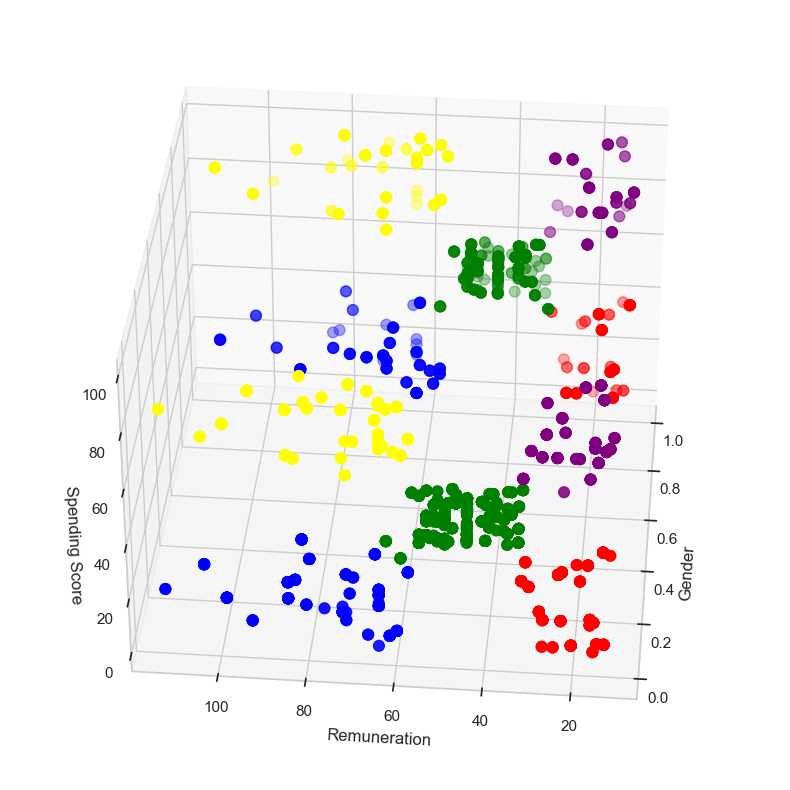

In [110]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each label (cluster) using the desired variables
ax.scatter(df4['gender'][df4.label == 0], df4['remuneration'][df4.label == 0], df4['spending_score'][df4.label == 0], c='purple', s=60)
ax.scatter(df4['gender'][df4.label == 1], df4['remuneration'][df4.label == 1], df4['spending_score'][df4.label == 1], c='red', s=60)
ax.scatter(df4['gender'][df4.label == 2], df4['remuneration'][df4.label == 2], df4['spending_score'][df4.label == 2], c='blue', s=60)
ax.scatter(df4['gender'][df4.label == 3], df4['remuneration'][df4.label == 3], df4['spending_score'][df4.label == 3], c='green', s=60)
ax.scatter(df4['gender'][df4.label == 4], df4['remuneration'][df4.label == 4], df4['spending_score'][df4.label == 4], c='yellow', s=60)

# Adjust the viewing angle for better visualization
ax.view_init(35, 185)

# Label the axes
plt.xlabel("Gender")
plt.ylabel("Remuneration")
ax.set_zlabel('Spending Score')

plt.show()

## 5. Fit final model and justify your choice

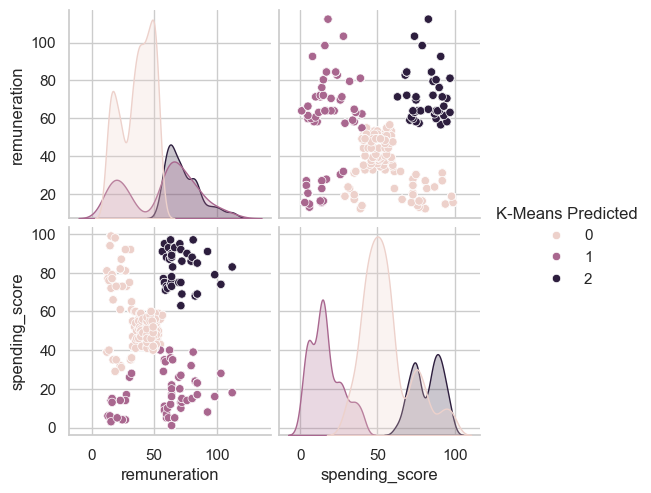

In [111]:
# Based on the above results we will use 5 clusters
# Apply the final model.
# Create a new dataframe
X = df2[['remuneration', 'spending_score']]
# Use 3 clusters:
kmeans = KMeans(n_clusters = 3,
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(X)

clusters = kmeans.labels_
X['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(X,
             hue='K-Means Predicted',
             diag_kind= 'kde')

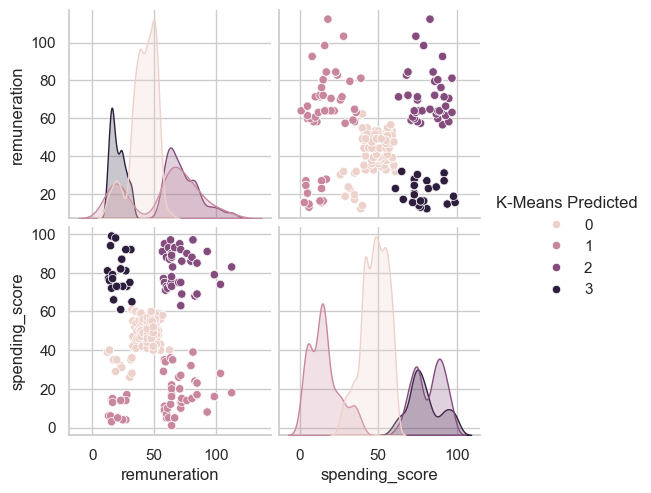

In [112]:
# Use 4 clusters:
kmeans = KMeans(n_clusters = 4,
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(X)

clusters = kmeans.labels_
X['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(X,
             hue='K-Means Predicted',
             diag_kind= 'kde')

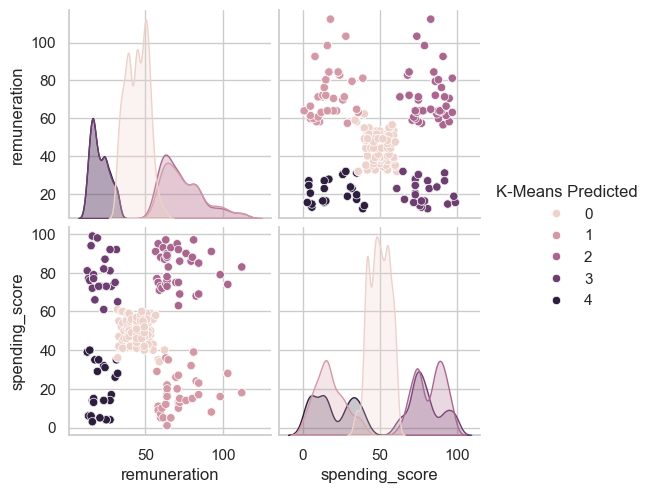

In [113]:
X = df2[['remuneration', 'spending_score']]
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(X)

clusters = kmeans.labels_
X['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(X,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [114]:
# Check the number of observations per predicted class.

X['K-Means Predicted'].value_counts()

K-Means Predicted
0    774
2    356
1    330
4    271
3    269
Name: count, dtype: int64

In [115]:
# View the K-Means predicted.
print(X.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  4
1         12.30              81                  3
2         13.12               6                  4
3         13.12              77                  3
4         13.94              40                  4


## 6. Plot and interpret the clusters

<Axes: xlabel='spending_score', ylabel='remuneration'>

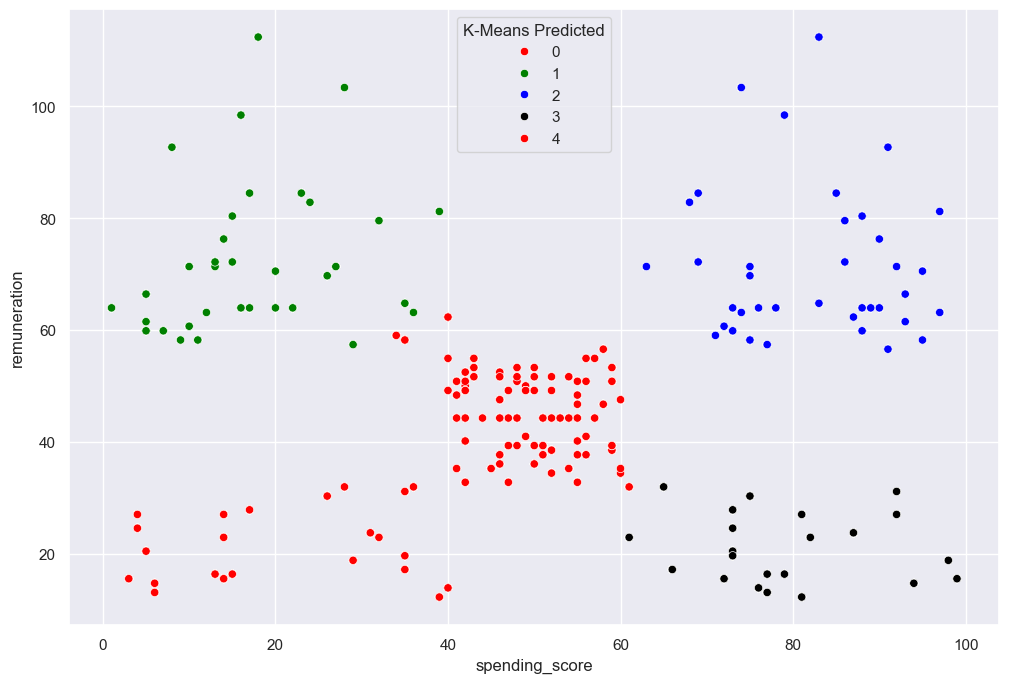

In [116]:

# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='spending_score' , 
                y ='remuneration',
                data=X , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black'])


## 7. Discuss: Insights and observations

***Your observations here...***

General Trends:

There's a positive correlation between remuneration and spending score.
The relationship is not strictly linear, with significant variation in spending behavior across different remuneration levels.


Customer Clusters:

Low Remuneration Cluster: Concentrated in the lower left corner, with remuneration below 40 and varied spending scores.
Mid Remuneration Cluster: Remuneration between 40-80, with a wide range of spending scores.
High Remuneration Cluster: Remuneration above 80, generally higher spending scores.


Gender Analysis:

No strong gender-based clustering or separation was observed.
Both genders are fairly evenly distributed across remuneration and spending levels.


K-means Clustering Results:

Cluster 0: Mid-range spending and remuneration (largest group)
Cluster 1: High remuneration, low to mid spending
Cluster 2: High remuneration and high spending
Cluster 3: Low remuneration but high spending
Cluster 4: Low remuneration and low spending


Key Insights:

Income doesn't always predict spending behavior.
There's a good spread of customer types across different segments.
The largest concentration of customers is in the mid-range for both remuneration and spending.


Implications for Business Strategy:

The clustering provides a basis for personalized marketing strategies.
Each cluster represents a different customer profile, allowing for tailored approaches in product offerings and customer service.
The insights can inform targeted marketing, customer experience personalization, and product development strategies.

# 

# Week 4 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [117]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [118]:
# Load the data set as df.

sentiments = pd.read_csv('turtle_reviews.csv')
# View DataFrame.
sentiments

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,EN,Web,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,EN,Web,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,EN,Web,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,EN,Web,1031,fun game!,Four Stars


In [119]:
# Explore data set.

sentiments.info()
print(sentiments.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB
               age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.0000

In [120]:
sentiments.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

In [121]:
# Keep necessary columns. Drop unnecessary columns.
reviews2 = sentiments[['review', 'summary']]

# View Dataframe
reviews2 


,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap
...,...,...
1995,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Great game. Did not think I would like it whe...,Super fun
1997,Great game for all.........\nKeeps the mind ni...,Great Game
1998,fun game!,Four Stars


In [122]:
# Determine if there are any missing values.

missing_values = reviews2.isnull().sum()

print("Missing values in each column:")
print(missing_values)

print("\nTotal missing values:")
print(missing_values.sum())


Missing values in each column:
review     0
summary    0
dtype: int64

Total missing values:
0


## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [123]:
# Review: Change all to lower case and join with a space.

reviews2['review'] = reviews2['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
reviews2['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [124]:
# Summary: Change all to lower case and join with a space.

reviews2['summary'] = reviews2['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
reviews2['summary'].head()


0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [125]:
# Replace all the punctuations in review column.

reviews2['review'] = reviews2['review'].str.replace('[^\w\s]','')

# View output.

reviews2['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [126]:
# Replace all the puncuations in summary column.
reviews2['summary'] = reviews2['summary'].str.replace('[^\w\s]','')

# View output.
reviews2['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2c) Drop duplicates in both columns

In [127]:
# Drop duplicates in both columns.

reviews2.review.duplicated().sum()
reviews3 = reviews2.drop_duplicates(subset=['review'])

# View DataFrame.
reviews3.reset_index(inplace=True)
reviews3.head()

,index,review,summary
0,0,"when it comes to a dm's screen, the space on t...",the fact that 50% of this space is wasted on a...
1,1,an open letter to galeforce9*: your unpainted ...,another worthless dungeon master's screen from...
2,2,"nice art, nice printing. why two panels are fi...","pretty, but also pretty useless"
3,3,amazing buy! bought it as a gift for our new d...,five stars
4,4,as my review of gf9's previous screens these w...,money trap


In [128]:
reviews3 = reviews2.drop_duplicates(subset=['summary'])

# Preview data.
reviews3.reset_index(inplace=True)
reviews3.head()

,index,review,summary
0,0,"when it comes to a dm's screen, the space on t...",the fact that 50% of this space is wasted on a...
1,1,an open letter to galeforce9*: your unpainted ...,another worthless dungeon master's screen from...
2,2,"nice art, nice printing. why two panels are fi...","pretty, but also pretty useless"
3,3,amazing buy! bought it as a gift for our new d...,five stars
4,4,as my review of gf9's previous screens these w...,money trap


## 3. Tokenise and create wordclouds

In [129]:
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\stavp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [130]:
# Apply tokenisation to both columns.

# Tokenise the words.
reviews3['tokens'] = reviews3['review'].apply(word_tokenize)

# Preview data.
reviews3['tokens'].head()

0    [when, it, comes, to, a, dm, 's, screen, ,, th...
1    [an, open, letter, to, galeforce9, *, :, your,...
2    [nice, art, ,, nice, printing, ., why, two, pa...
3    [amazing, buy, !, bought, it, as, a, gift, for...
4    [as, my, review, of, gf9, 's, previous, screen...
Name: tokens, dtype: object

In [131]:
reviews3['tokens'] = reviews3['summary'].apply(word_tokenize)

# Preview data.
reviews3['tokens'].head()

0    [the, fact, that, 50, %, of, this, space, is, ...
1    [another, worthless, dungeon, master, 's, scre...
2              [pretty, ,, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: tokens, dtype: object

In [132]:
# Define an empty list of tokens.
all_tokens = []

for i in range(reviews3.shape[0]):
    # Add each token to the list.
    all_tokens = all_tokens + reviews3['tokens'][i]

# Import the FreqDist class.
from nltk.probability import FreqDist

# Calculate the frequency distribution.
fdist = FreqDist(all_tokens)

# Preview data.
fdist

FreqDist({'!': 389, 'game': 276, 'the': 260, 'great': 250, 'a': 239, 'for': 232, '.': 217, 'to': 192, 'fun': 182, 'it': 177, ...})

In [133]:
# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
tokens = [word for word in all_tokens if word.isalnum()]

In [134]:
# Download the stopword list.
nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords.
tokens2 = [x for x in tokens if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens2_string = ''

for value in tokens:
    # Add each filtered token word to the string.
    tokens2_string = tokens2_string + value + ' '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\stavp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [135]:
# Review: Create a word cloud.
text = ' '.join(reviews3['review'].astype(str))
wordcloud = WordCloud(width=1600, height=900, 
                      background_color='white', 
                      colormap='plasma', 
                      min_font_size=10).generate(text)

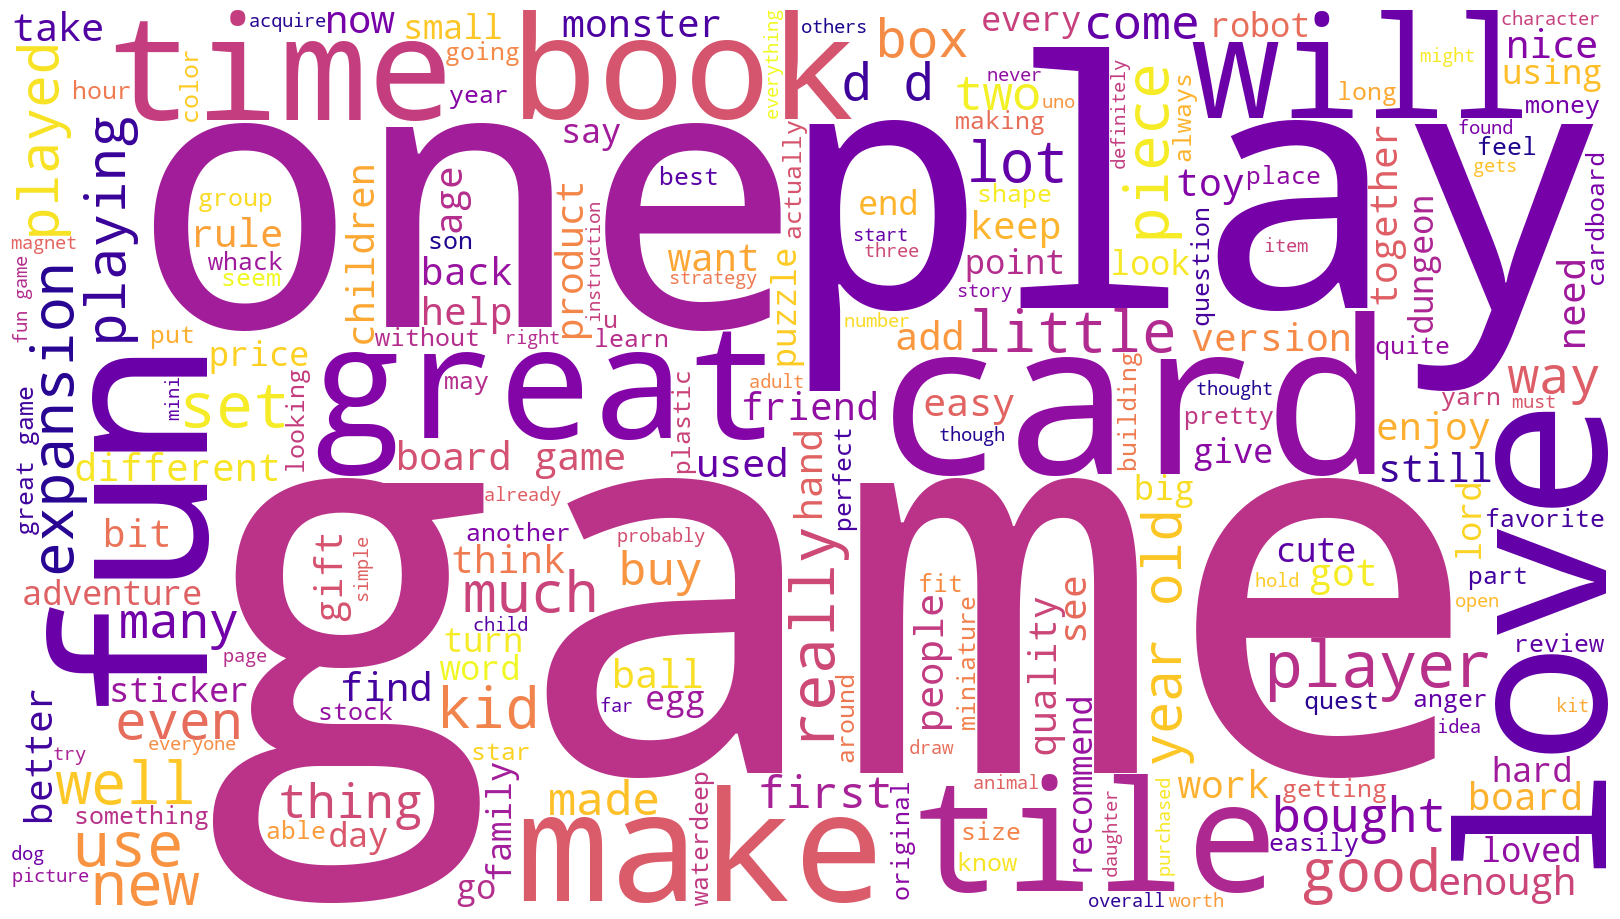

In [136]:
# Plot the WordCloud image
plt.figure(figsize=(16, 9), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [137]:
# Summary: Create a word cloud.
text = ' '.join(reviews3['summary'].astype(str))
wordcloud = WordCloud(width=1600, height=900, 
                      background_color='white', 
                      colormap='plasma', 
                      min_font_size=10).generate(text)

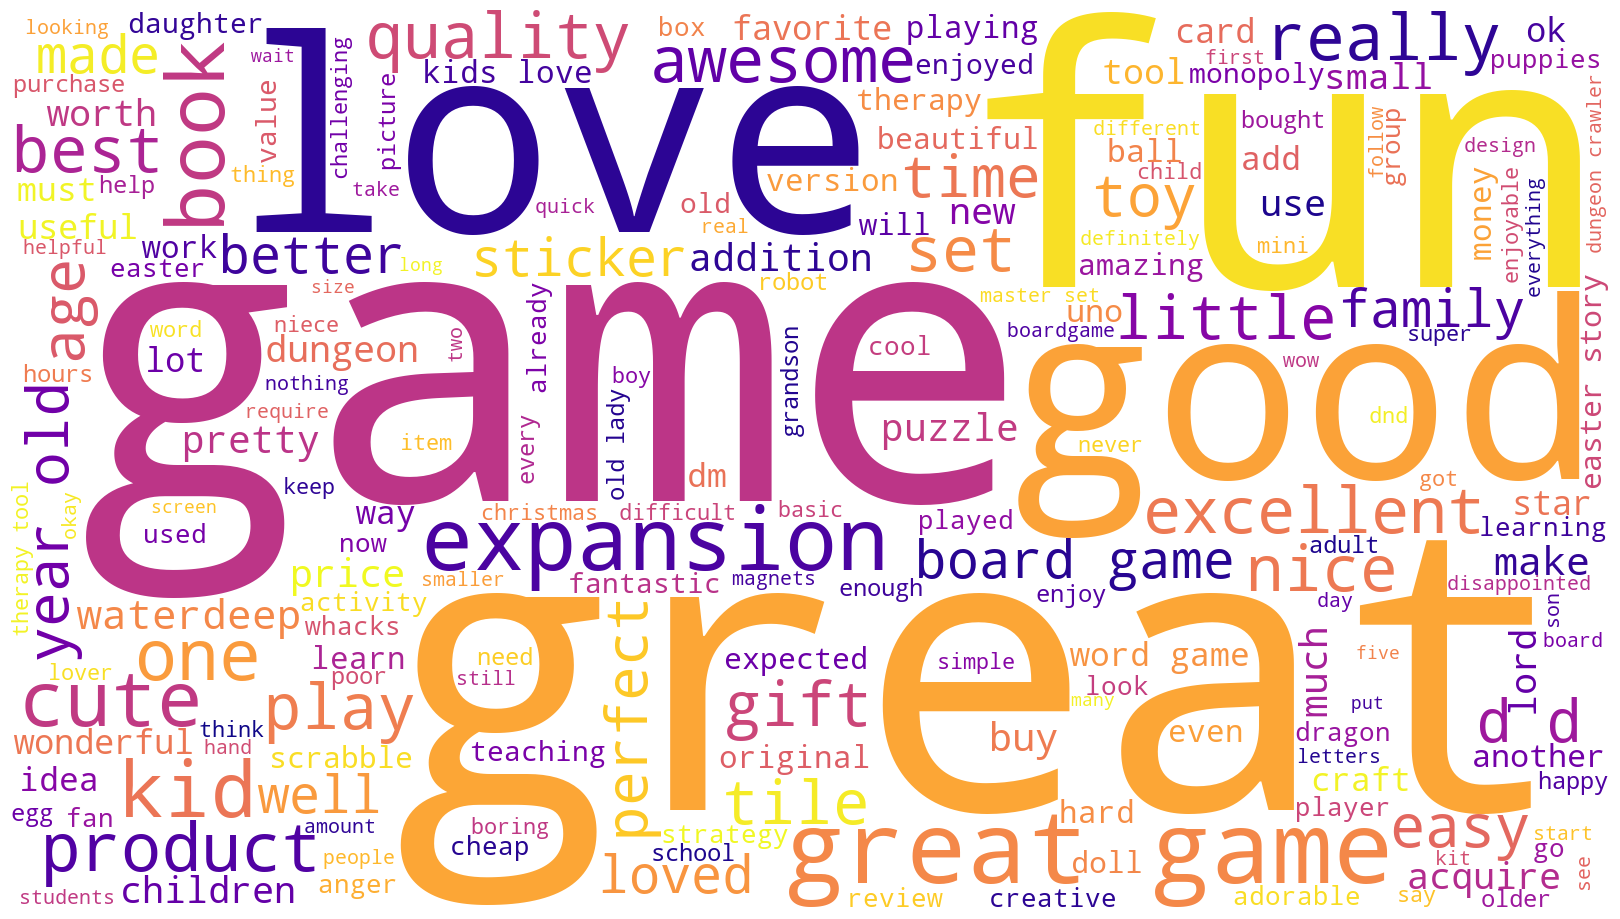

In [138]:
# Summary: Plot the WordCloud image.
plt.figure(figsize=(16, 9), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [139]:
# Determine the frequency distribution.
freq1 = FreqDist(tokens2)

# Preview the data.
freq1

FreqDist({'game': 276, 'great': 250, 'fun': 182, 'good': 87, 'love': 79, 'like': 54, 'kids': 50, 'expansion': 44, 'book': 42, 'cute': 41, ...})

### 4d) Identify 15 most common words and polarity

In [140]:
# Determine the 15 most common words.
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
counts = pd.DataFrame(Counter(tokens2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts

,Frequency
Word,
game,276
great,250
fun,182
good,87
love,79
like,54
kids,50
expansion,44
book,42


## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [141]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [142]:
# Import the necessary package
from textblob import TextBlob

# Define a function to extract a polarity score for the comment.
def generate_polarity(comment):
    return TextBlob(comment).sentiment[0]

# Populate a new column with polarity scores for each comment.
reviews3['polarity'] = reviews3['review'].apply(generate_polarity)

# Preview the result.
reviews3['polarity'].head()

0   -0.036111
1    0.035952
2    0.116640
3    0.628788
4   -0.316667
Name: polarity, dtype: float64

In [143]:
# Define a function to extract a polarity score for the comment.
def generate_polarity(comment):
    return TextBlob(comment).sentiment[0]

# Populate a new column with polarity scores for each comment.
reviews3['polarity'] = reviews3['summary'].apply(generate_polarity)

# Preview the result.
reviews3['polarity'].head()

0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: polarity, dtype: float64

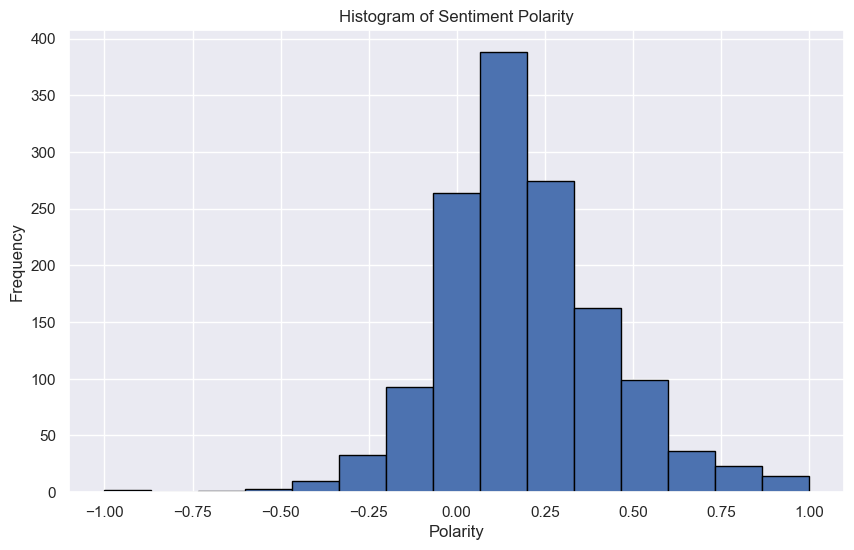

In [144]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity

# Function to calculate the polarity
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

# Apply the function to the review column
reviews3['polarity'] = reviews3['review'].apply(get_polarity)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(reviews3['polarity'], bins=15, edgecolor='black')
plt.title('Histogram of Sentiment Polarity')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



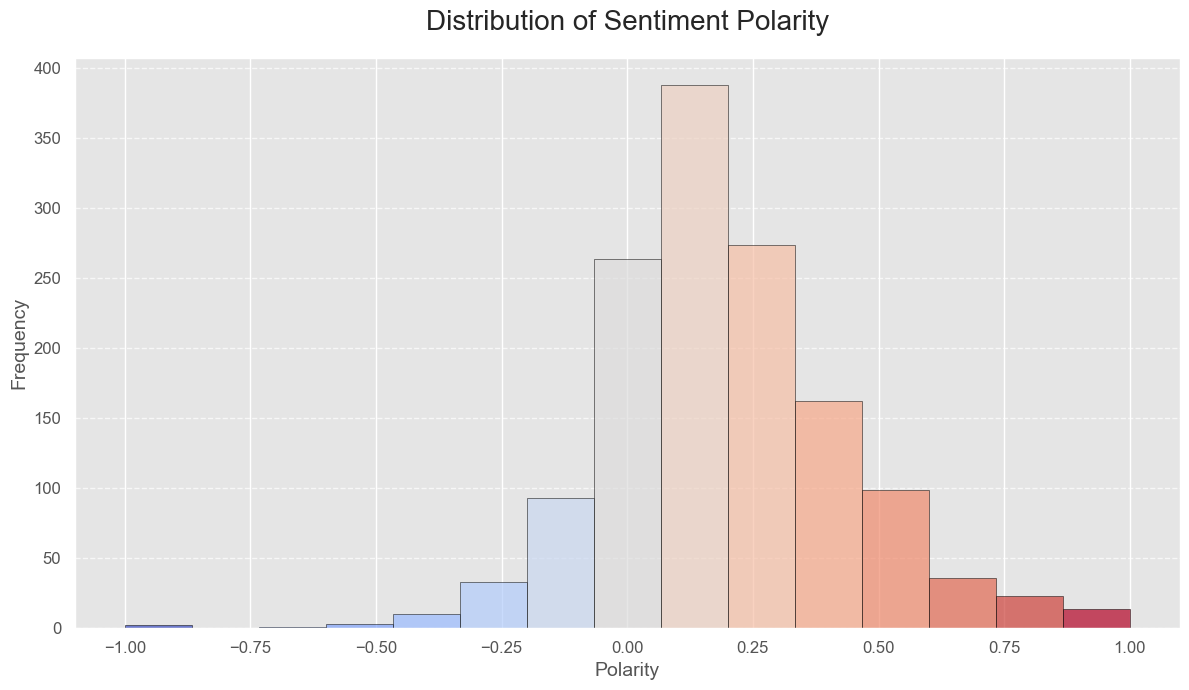

In [145]:
# Review: Create a histogram plot with bins = 15.
# Function to calculate the polarity
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

# Apply the function to the review column
reviews3['polarity'] = reviews3['review'].apply(get_polarity)

# Set the style
plt.style.use('ggplot')

# Create the figure
plt.figure(figsize=(12, 7))

# Plot the histogram
n, bins, patches = plt.hist(reviews3['polarity'], bins=15, edgecolor='black', alpha=0.7)

# Color the bars based on their x-position
cm = plt.cm.get_cmap('coolwarm')
bin_centers = 0.5 * (bins[:-1] + bins[1:])
col = bin_centers - min(bin_centers)
col /= max(col)
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))

# Customize the plot
plt.title('Distribution of Sentiment Polarity', fontsize=20, pad=20)
plt.xlabel('Polarity', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

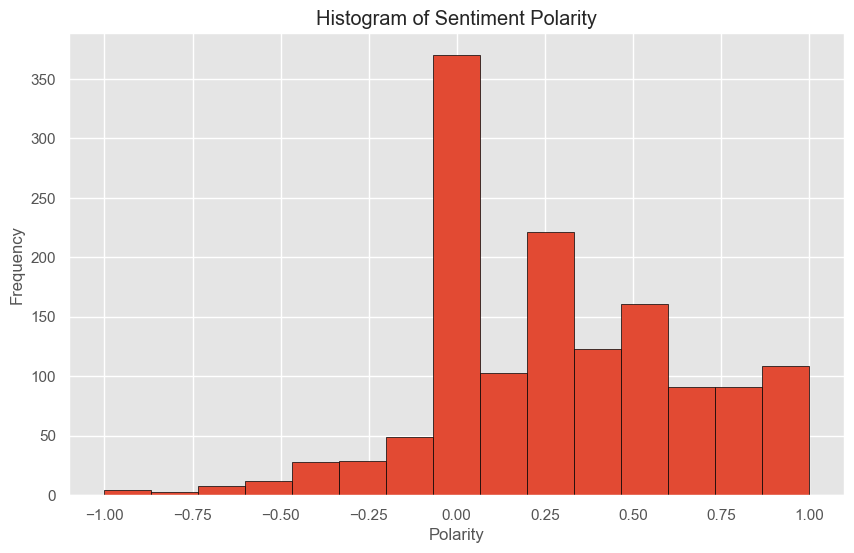

In [146]:
# Summary: Create a histogram plot with bins = 15.

# Function to calculate the polarity
def get_polarity(text):
    return TextBlob(text).sentiment.polarity
# Histogram of polarity
reviews3['polarity'] = reviews3['summary'].apply(get_polarity)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(reviews3['polarity'], bins=15, edgecolor='black')
plt.title('Histogram of Sentiment Polarity')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Histogram of sentiment score


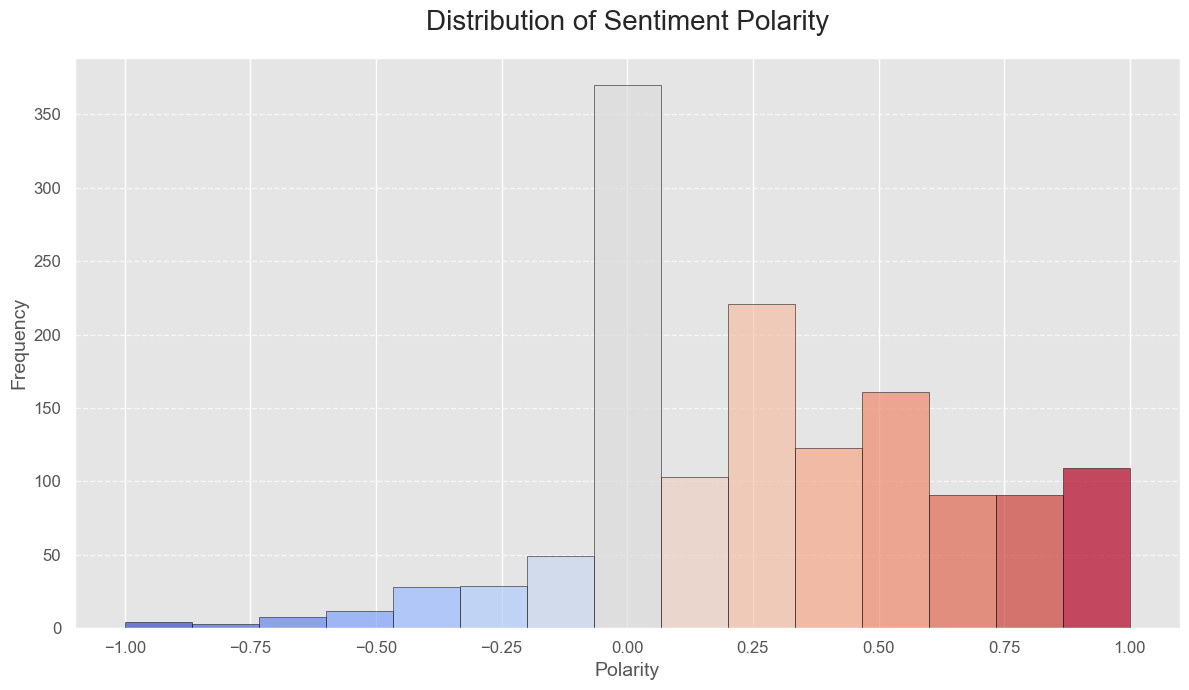

In [147]:
# Function to calculate the polarity
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

# Apply the function to the review column
reviews3['polarity'] = reviews3['summary'].apply(get_polarity)

# Set the style
plt.style.use('ggplot')

# Create the figure
plt.figure(figsize=(12, 7))

# Plot the histogram
n, bins, patches = plt.hist(reviews3['polarity'], bins=15, edgecolor='black', alpha=0.7)

# Color the bars based on their x-position
cm = plt.cm.get_cmap('coolwarm')
bin_centers = 0.5 * (bins[:-1] + bins[1:])
col = bin_centers - min(bin_centers)
col /= max(col)
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))

# Customize the plot
plt.title('Distribution of Sentiment Polarity', fontsize=20, pad=20)
plt.xlabel('Polarity', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [148]:
# Top 20 negative reviews.
# Create a DataFrame.
negative_sentiment = reviews3.nsmallest(20, 'polarity')

# Eliminate unnecessary columns.
negative_sentiment = negative_sentiment[['review']]

# Eliminate unnecessary columns.
negative_sentiment.style.set_properties(subset=['review'], **{'width': '1200px'})


,review
17,"these are cute tatoos for those who love pirates, however, the retail price is $1.50 and amazon's price is more than double. i have never paid over the retail price for an item at amazon. i was shocked. there are only a handful of tatoos, and for 1.50 i wouldn't mind, but to charge 3.50 for an item that sells anywhere else for 1.50 is criminal. find it at a local drugstore and save your $."
166,booo unles you are patient know how to measure i didn't have the patience neither did my daughter. boring unless you are a craft person which i am not.
602,"i've discovered that i'm really ""new school"" when it comes to my board games. except for boggle (and a couple chess boards and a novelty version of yahtzee), this is the oldest game i own by more than 30 years. it's very watered down for my usual tastes. gameplay consists of playing tiles on a board to start, expand, or merge hotel chains. then you buy stocks, trying to predict which ones will grow so you can buy as low as possible and sell them for huge profits by the end of the game. the player with the most money at the end wins. i think this game is certainly better with more people. it can accommodate up to 6 and that may be too many (i've never played with that number) but with 3 or fewer it is too easy to run away with the game. more players offers more competition and gaps between your turns and dilutes the available stock. with three you can see what tiles you have available and buy up huge amounts of stock early before other players have time to react and attempt to thwart your plan or prevent you from a big pay-out. i've enjoyed power grid and have intended on playing a deeper economic game for some time but this certainly isn't it. this is much more shallow an experience although it does play reasonably quickly and may fill a shorter time slot if players are looking for a quick buy and sell stock game."
862,before this i hated running any rpg campaign dealing with towns because it kills the momentum and just becomes 2 hours of haggling for magic items. this helps open up story ideas and plot hooks.
1,"an open letter to galeforce9*: your unpainted miniatures are very not bad. your spell cards are great. your board games are ""meh"". your dm screens, however, are freaking terrible. i'm still waiting for a single screen that isn't polluted with pointless artwork where useful, reference-able tables should be. once again, you've created a single use screen that is only useful when running the ""storm king's thunder"" adventure. even despite the fact that it's geared to that adventure path, it's usefulness negligible, at best. i massive swath of the inner panel is wasted on artwork and a bloated overland map, which could have been easily reduced to a single panel in size. and the few table you have are nigh-useless themselves. in short, stop making crap dm screens."
116,"my kids grew up with a peg bench and hammer and loved it, but i bought this brand for my grandson and was disappointed. the pegs fit too loosely into the bench and he does not even use his hammer to pound them in, as he can just push them in with his hand, or sometimes they fall through automatically. my suggestion is to make the pegs fit a little tighter so the kids can learn skills of coordination, etc when pounding them in. the pegs are nice and thick for little hands, but just not snug enough fitting to really use the toy as it is intended,"
458,eggs split and were unusable.
269,"i found that this card game does the opposite of what it was intended for. it actually has the kids focusing on ways to get angry, etc. instead of teaching how to be calm and act better. it really should have been tested before sale. a better game would have been calm dragon. i tried this game on kids that had absolutely no behavior or anger problems and they began behaving badly and getting angry after the second round. i don't recommend this. i am a therapist and i work with kids with anger issues all day long, i t

In [149]:
# Top 20 negative summaries.
# Create a DataFrame.
negative_sentiment = reviews3.nsmallest(20, 'polarity')

# Eliminate unnecessary columns.
negative_sentiment = negative_sentiment[['summary']]

# Eliminate unnecessary columns.
negative_sentiment.style.set_properties(subset=['summary'], **{'width': '1200px'})




,summary
17,the worst value i've ever seen
166,boring unless you are a craft person which i am ...
602,boring
862,before this i hated running any rpg campaign dealing with towns because it ...
1,another worthless dungeon master's screen from galeforce9
116,disappointed
458,disappointed.
269,promotes anger instead of teaching calming methods
651,"too bad, this is not what i was expecting."
656,bad quality-all made of paper


In [150]:
# Top 20 positive reviews.
positive_sentiment = reviews3.nlargest(20, 'polarity')

# Eliminate unnecessary columns.
positive_sentiment = positive_sentiment[['review']]

# Adjust the column width.
positive_sentiment.style.set_properties(subset=['review'], **{'width': '1200px'})



,review
5,"i have bought many gm screens over the years, but this one is the best i have ever seen. it has all the relevant information i need , and no crap filler on it. very happy with this screen."
23,these are intricate designs for older children and adults. this book is full of beautiful designs just waiting to be awakened by your choice of colors. great for creativity.
27,awesome! my 8 year old's favorite xmas gift! it's 9:15 am xmas morning and he's already colored three of these!!
32,"great buy! can't wait to work on this book. the dragon images are lovely. once i'm done coloring, i will frame and hang in a window to let the sun shines through."
35,i absolutely love this book! its translucent paper make it super fun to use. i have been using paint brush markers and sakura gel pens on it with excellent quality. the only thing that i would recommend is a blank white sheet of paper to make the lines easier to see.
43,"these little books are great! they are small, but perfect for birthday party favors, which is what we used them for! there is a blank page after each page of stickers, so that's where my kids made their robots. they were a huge hit!"
61,my daughter loves these little books. they're the perfect size to keep in the car or a diaper bag or purse. i keep them on hand for times when we're stuck waiting in a doctor's office or anywhere else.
95,"we bought this to give to young children that attended our wedding. kid's ranged from 4-10 years old. it would have been to have multiple robots to decorate, but the price of the book and actually the small size came in handy for us - perfect to give out to kids and fit nicely in a little treat box for them. this is great for a little gift to make a child feel special - and to keep them occupied for a bit!"
107,"this occupied my almost-3 year old for nearly an hour. stickers were durable and easy to peel. afterwards, he kept going back to the box to see if there were more robot stickers to assemble in there. i'll probably drop another dollar and buy it again for his christmas stocking. three cheers for the short memory of a preschooler!"
112,"i bought 8 of these for my 3 year old daughter's robot themed birthday party as favors for the little ones and it was a great hit! i didn't realize that the stickers were robot parts that the kids assemble themselves to create their own robots! that was a lot of fun and for the price, it was well worth it!"


In [151]:
# Top 20 positive summaries.
positive_sentiment = reviews3.nlargest(20, 'polarity')

# Eliminate unnecessary columns.
positive_sentiment = positive_sentiment[['summary']]

# Adjust the column width.
positive_sentiment.style.set_properties(subset=['summary'], **{'width': '1200px'})



,summary
5,best gm screen ever
23,wonderful designs.
27,perfect!
32,great buy! can't wait to work on this book
35,so beautiful!
43,great!
61,they're the perfect size to keep in the car or a diaper ...
95,great for a gift!
107,perfect for preschooler
112,awesome sticker activity for the price


## 7. Discuss: Insights and observations

***Your observations here...***

Word Cloud Analysis:

Reviews focus on board games, toys, and educational products.
Prominent positive words include "great," "love," "fun," and "good."
Products cater to various age groups, with emphasis on children and families.
Educational value is highlighted with words like "learn" and "students."
Quality and value are frequently mentioned positively.


Product Range:

Diverse product categories including games, toys, books, and puzzles.
Some specific games like Scrabble are mentioned.
Products often serve as gifts for various occasions.


Customer Experience:

Generally positive experiences reported.
Social and family aspects of products are emphasized.
Time and difficulty levels are noted, suggesting varying complexity in products.


Sentiment Analysis (Polarity of Reviews):

Two slightly different distributions were presented:
a. First distribution:

Right-skewed with peak at mildly positive sentiment (0.1 to 0.2 polarity).
Overall positive bias in reviews.
b. Second distribution:
Bimodal with peaks at neutral (0 polarity) and moderately positive (0.25 to 0.5 polarity).
Still shows an overall positive bias.


Both analyses show:

Full range of sentiments from -1.0 (very negative) to 1.0 (very positive).
More positive reviews than negative ones.
Relatively few extremely negative reviews.
Some presence of extremely positive reviews, especially in the second distribution.




Key Insights:

Products generally receive positive feedback.
Educational and entertainment value are both important to customers.
Family-oriented and age-appropriate products are significant.
Quality and value for money are important factors for customers.

# 